## Praca domowa 4

#### Autor: Mikołaj Gałkowski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.
df1 = df[(df.Year > 2015) & (df.NA_Sales < df.EU_Sales) & (df.Publisher == "Nintendo")][["Name"]]
df1

,Name
4199,Mario & Sonic at the Rio 2016 Olympic Games
6477,Mario & Sonic at the Rio 2016 Olympic Games
14703,Teddy Together


In [4]:
# b) Jak rodzaj gry zarobił najwięcej w roku 2010?
df2 = df.loc[df.Year == 2010, ["Global_Sales", "Genre"]].groupby("Genre").sum()
result = df2[df2.Global_Sales == max(df2.Global_Sales)]
result

,Global_Sales
Genre,
Action,117.64


In [5]:
# c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. 
#    Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny Typ Gry i Średnia sprzedaż w Japonii.
df3 = df.groupby("Genre")[['JP_Sales', "EU_Sales"]].agg('mean').query("JP_Sales > EU_Sales")
df3.reset_index(level=0, inplace=True)
df3 = df3.rename(columns={'Genre': 'Typ Gry', 'JP_Sales': 'Średnia sprzedaż w Japonii'})
df3 = df3.iloc[:,[0, 1]].sort_values("Średnia sprzedaż w Japonii", ascending = False)
df3

,Typ Gry,Średnia sprzedaż w Japonii
1,Role-Playing,0.238293
0,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

In [6]:
from IPython.display import Image

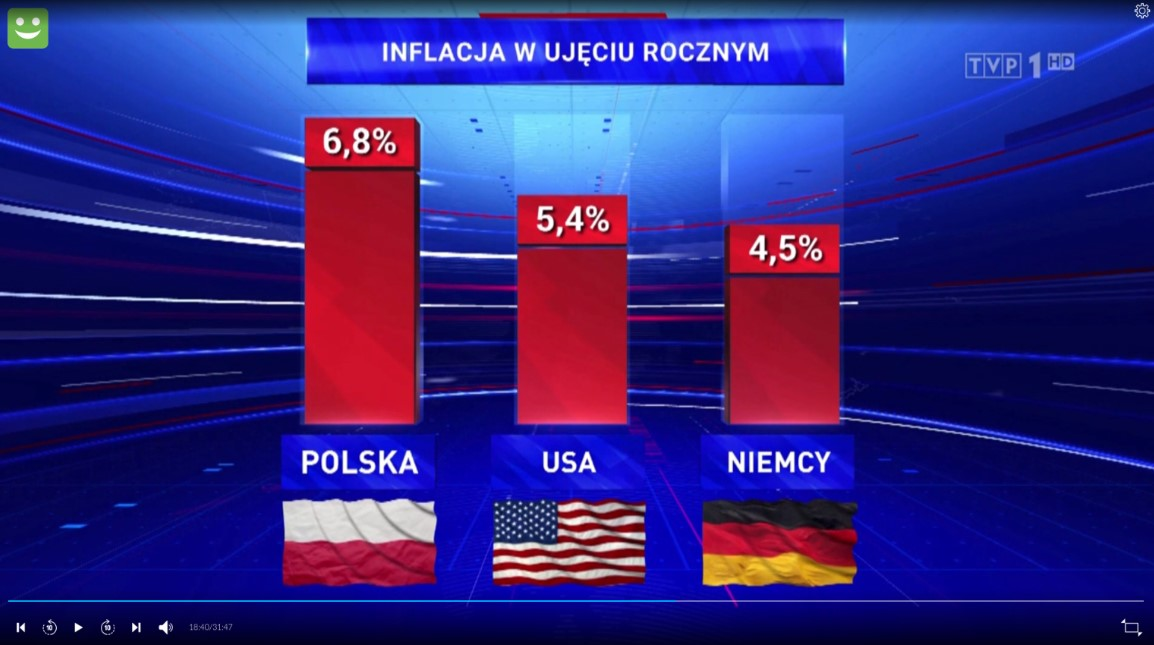

In [7]:
# 1)
Image(filename='wykresOryginal.jpg')
# Źródło https://vod.tvp.pl/website/wiadomosci,30904465

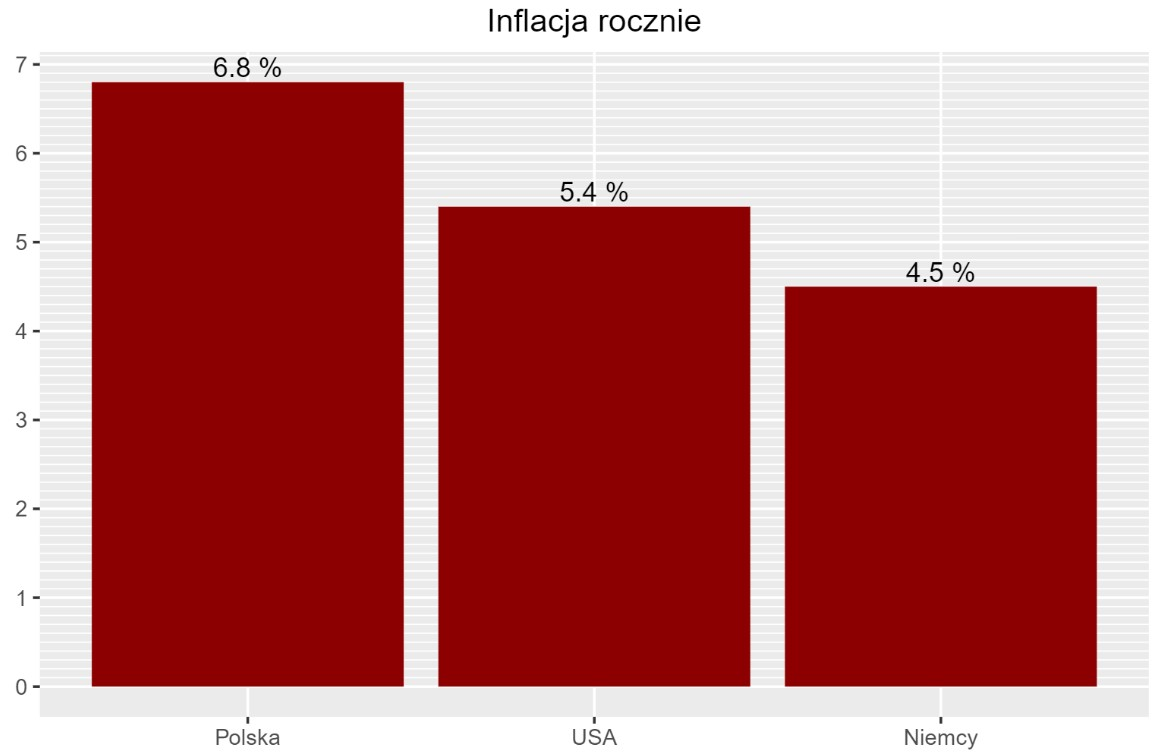

In [8]:
# 2) 
Image(filename="wykresPoprawiony.jpg")
# Źródło https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/GelarPawel/hw2_raport.pdf

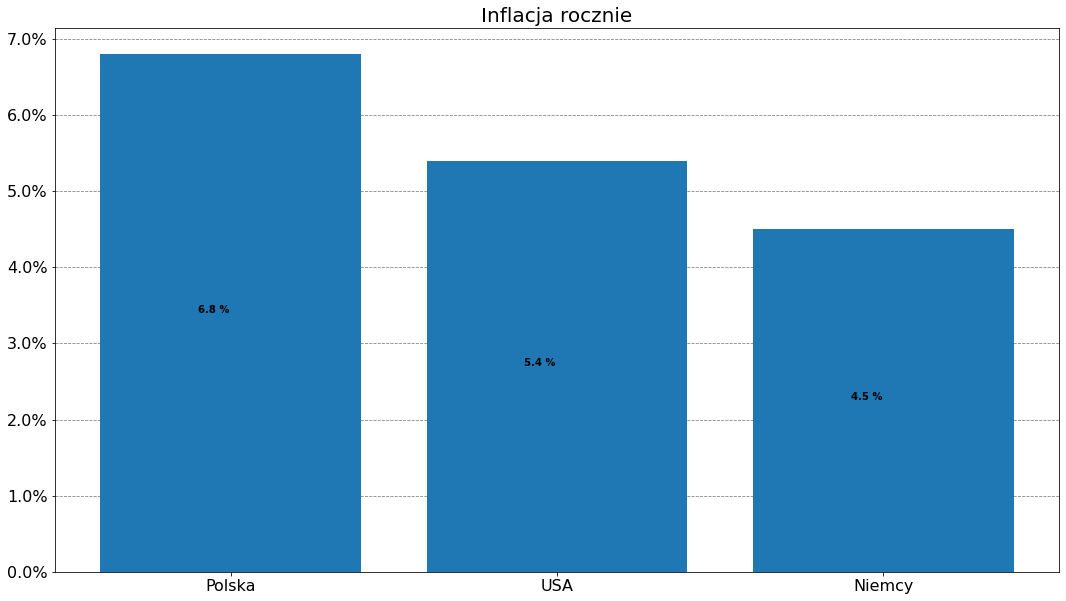

In [9]:
# 3)  
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
data = {'Kraj': ['Polska', 'USA', 'Niemcy'], 'Inflacja': [6.8, 5.4, 4.5]}   
df = pd.DataFrame(data)  
#sns.barplot(data = df, x = 'Kraj', y = 'Inflacja')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.bar("Kraj", 'Inflacja', data = df)
ax.yaxis.set_major_formatter(PercentFormatter())
ax.text(-.1, 6.8/2, "6.8 %", color='black', fontweight='bold')
ax.text(.9, 5.4/2, "5.4 %", color='black', fontweight='bold')
ax.text(1.9, 4.5/2, "4.5 %", color='black', fontweight='bold')
plt.title("Inflacja rocznie")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')  
ax.title.set_fontsize(20)
ax.yaxis.label.set_fontsize(14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# 4 część

##  Uzasadnienie

Moim zdaniem wykres utworzony przeze mnie jest czytelniejszy aniżeli 2 poprzednie. Pierwszy z nich nie posiada osi OY oraz nie zachowuje skali pomiędzy słupkami. Drugi jest dość czytelny. Na moim poprawiona została oś OY (dodane %), kolory oraz grid za wykresem. Według mnie dzięki temu czytelność wykresu poprawiła się.